Importing Libraries

In [ ]:
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
# connecting to the Google drive
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data Sets

In [ ]:
A= pd.read_excel('drive/MyDrive/Churn_Project/2018_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
B=pd.read_excel('drive/MyDrive/Churn_Project/2019_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
C=pd.read_excel('drive/MyDrive/Churn_Project/2020_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
D=pd.read_excel('drive/MyDrive/Churn_Project/2021_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
E=pd.read_excel('drive/MyDrive/Churn_Project/2022_03_31_Establishment_Data_Extract.xlsx')

Checking across each file 

In [ ]:
A.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,NaT,NaT,NaN,740974004Y,1950110spi,NaN,NaN,0,NaN,1
1,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,NaT,NaT,NaN,740974004Y,2102900LiG,NaN,NaN,0,NaN,1
2,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,NaT,NaT,NaN,740974004Y,32054807if,NaN,NaN,0,NaN,1


In [ ]:
B.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2019-02-01,2019-02-28,02/2019,2,1,18/19,0,0,0,...,NaT,NaT,NaN,740974004Y,39330321kR,NaN,NaN,0,NaN,1
1,0,2019-02-01,2019-02-28,02/2019,2,1,18/19,0,0,0,...,2018-08-01,2020-04-30,NaN,740974004Y,2095201Qg6,4114111Qg6,43616601YZ,1,NaN,1
2,0,2019-02-01,2019-02-28,02/2019,2,1,18/19,0,0,0,...,2019-01-10,2019-12-31,Occasional Worker Contract,740974004Y,6412671vGm,8100261vGm,0279480NN0,1,NaN,1


In [ ]:
C.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2020-04-01,2020-04-30,04/2020,4,1,19/20,0,0,0,...,2019-01-01,2020-07-31,NaN,740974004Y,4023981tM3,3164661tM3,2885250BiC,1,NaN,1
1,0,2020-04-01,2020-04-30,04/2020,4,1,19/20,0,0,0,...,NaT,NaT,NaN,740974004Y,45440701YW,NaN,NaN,0,NaN,1
2,0,2020-04-01,2020-04-30,04/2020,4,1,19/20,0,0,0,...,2019-10-07,2021-08-31,NaN,740974004Y,7632452tma,0731832tma,9384112YE2,1,NaN,1


In [ ]:
D.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2021-02-01,2021-02-28,02/2021,2,1,20/21,0,0,0,...,NaT,NaT,NaN,740974004Y,2925091B9P,NaN,NaN,0,NaN,1
1,0,2021-02-01,2021-02-28,02/2021,2,1,20/21,0,0,0,...,NaT,NaT,NaN,740974004Y,55057901YW,NaN,NaN,0,NaN,1
2,0,2021-02-01,2021-02-28,02/2021,2,1,20/21,0,0,0,...,NaT,NaT,NaN,740974004Y,7892541AJz,NaN,NaN,0,NaN,1


In [ ]:
E.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2022-02-01,2022-02-28,02/2022,2,1,21/22,0,0,0,...,2021-08-17,NaT,Time Limited Requirement,740974004Y,0636774lDg,7654494luD,3439144l6v,1,NaN,1
1,0,2022-02-01,2022-02-28,02/2022,2,1,21/22,0,0,0,...,2021-09-20,NaT,Occasional Worker Contract,740974004Y,4075844rf6,9594914rf6,4756304rf6,1,NaN,1
2,0,2022-02-01,2022-02-28,02/2022,2,1,21/22,0,0,0,...,2021-03-01,NaT,NaN,740974004Y,93800546mB,39215646mB,88844346mB,1,NaN,1


Concatinating All the files

In [ ]:
#Concatinating the files together for easier analysis
dt = [A,B,C,D,E]
df = pd.concat(dt)

In [ ]:
df.shape

(291837, 91)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291837 entries, 0 to 52434
Data columns (total 91 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Month Number                                291837 non-null  int64         
 1   START PERIOD                                291837 non-null  datetime64[ns]
 2   END PERIOD                                  291837 non-null  datetime64[ns]
 3   REPORT RUN PERIOD                           291837 non-null  object        
 4   REPORT MONTH                                291837 non-null  int64         
 5   YTD FLAG                                    291837 non-null  int64         
 6   Academic Year                               291837 non-null  object        
 7   FIN YTD START FLAG                          291837 non-null  int64         
 8   FIN YTD START POS                           291837 non-null  int64         

### - Clarify what each column represents e.g. **Position Start Date**, **Position End Date** as against **Leaving Date**... since i am confused

### - Get his input as to the next steps to take. 

### - How do you get the cost per hire. 




In [ ]:
#Checking for blanks in the Data
df.isna().sum()

Month Number                   0
START PERIOD                   0
END PERIOD                     0
REPORT RUN PERIOD              0
REPORT MONTH                   0
                           ...  
PARTY LNK ID OCCUPANCY     19419
PERSON ID                  19419
distinct person id             0
Unnamed: 89               291837
distinct position id           0
Length: 91, dtype: int64

In [ ]:
# Checking summary of the numeric columns og thr Data
df.describe()

,Month Number,REPORT MONTH,YTD FLAG,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,JOINER IN PERIOD,LEAVER IN PERIOD,HEADCOUNT PERIOD END,New position in period,...,Pro Rated Salary,Off Scale Salary,Actual Scalepoint Val,Academic employment function code,SERVICE LENGTH DAYS,SERVICE LENGTH YEARS,ONE YEARS SERVICE FLAG,distinct person id,Unnamed: 89,distinct position id
count,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,...,262465.000000,1233.000000,261232.000000,291123.000000,271696.000000,271696.000000,291837.000000,291837.000000,0.0,291837.0
mean,-6.597659,5.776481,0.166874,0.069172,0.069172,0.131337,0.028482,0.033197,0.914284,0.049439,...,21379.503468,75014.393706,33401.180277,3.023787,2386.455108,6.059364,0.679808,0.933459,NaN,1.0
std,4.060749,3.601480,0.372864,0.253747,0.253747,0.337769,0.166345,0.179150,0.279944,0.216782,...,22945.565649,55555.945805,17828.507202,1.432128,3012.187684,8.225584,0.466551,0.249225,NaN,0.0
min,-13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,17354.480000,14767.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0
25%,-10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,22494.000000,18189.000000,1.000000,327.000000,0.000000,0.000000,1.000000,NaN,1.0
50%,-7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,17361.000000,70059.000000,28331.000000,4.000000,1037.000000,2.000000,1.000000,1.000000,NaN,1.0
75%,-3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,37467.000000,85838.000000,43686.000000,4.000000,3411.000000,9.000000,1.000000,1.000000,NaN,1.0
max,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,251593.000000,251593.000000,159307.000000,9.000000,19876.000000,54.000000,1.000000,1.000000,NaN,1.0


In [ ]:
#Table showing correlation among columns
df.corr()

,Month Number,REPORT MONTH,YTD FLAG,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,JOINER IN PERIOD,LEAVER IN PERIOD,HEADCOUNT PERIOD END,New position in period,...,Pro Rated Salary,Off Scale Salary,Actual Scalepoint Val,Academic employment function code,SERVICE LENGTH DAYS,SERVICE LENGTH YEARS,ONE YEARS SERVICE FLAG,distinct person id,Unnamed: 89,distinct position id
Month Number,1.000000,0.337683,0.636919,0.012301,0.012301,-0.020799,0.018088,-0.001921,-0.026898,0.014325,...,0.016482,0.004436,0.027358,-0.023545,0.006065,0.006902,-0.025395,-0.029859,NaN,NaN
REPORT MONTH,0.337683,1.000000,-0.491709,0.168303,0.168303,-0.515698,-0.005560,0.035484,-0.022283,-0.014247,...,0.014230,0.016185,0.012887,0.000183,0.011781,0.009492,0.001078,-0.004098,NaN,NaN
YTD FLAG,0.636919,-0.491709,1.000000,-0.122003,-0.122003,0.380795,0.022758,-0.025735,-0.000317,0.028841,...,0.008743,-0.011905,0.017592,-0.022349,-0.003133,-0.000535,-0.029204,-0.014988,NaN,NaN
FIN YTD START FLAG,0.012301,0.168303,-0.122003,1.000000,1.000000,-0.105998,-0.010550,0.003231,-0.019520,0.022487,...,0.010688,0.024562,0.010837,0.008260,0.012634,0.008891,0.001323,-0.021985,NaN,NaN
FIN YTD START POS,0.012301,0.168303,-0.122003,1.000000,1.000000,-0.105998,-0.010550,0.003231,-0.019520,0.022487,...,0.010688,0.024562,0.010837,0.008260,0.012634,0.008891,0.001323,-0.021985,NaN,NaN
YTD START FLAG - Person,-0.020799,-0.515698,0.380795,-0.105998,-0.105998,1.000000,0.056737,-0.020465,0.008857,0.045537,...,-0.003902,-0.002173,-0.001481,-0.005098,-0.007110,-0.004031,0.002254,-0.000756,NaN,NaN
JOINER IN PERIOD,0.018088,-0.005560,0.022758,-0.010550,-0.010550,0.056737,1.000000,0.019670,0.032117,0.651959,...,-0.114709,-0.005290,-0.064777,-0.031371,-0.139650,-0.130864,-0.249485,0.045714,NaN,NaN
LEAVER IN PERIOD,-0.001921,0.035484,-0.025735,0.003231,0.003231,-0.020465,0.019670,1.000000,-0.276274,-0.000879,...,-0.109243,0.020899,-0.061403,-0.016635,-0.086571,-0.086459,-0.073218,0.049474,NaN,NaN
HEADCOUNT PERIOD END,-0.026898,-0.022283,-0.000317,-0.019520,-0.019520,0.008857,0.032117,-0.276274,1.000000,-0.063933,...,0.259868,0.016112,0.089490,-0.019059,0.071262,0.070573,0.369695,0.871979,NaN,NaN
New position in period,0.014325,-0.014247,0.028841,0.022487,0.022487,0.045537,0.651959,-0.000879,-0.063933,1.000000,...,-0.135241,-0.082632,-0.069273,-0.012116,-0.100636,-0.094285,-0.206336,-0.069255,NaN,NaN


In [ ]:
#Checking for the different Division available
df.Division.unique()

array(['Academic Affairs', 'Vice-Chancellor', 'Chief Finance Office',
       'Education', 'Human Resources', 'Research and Enterprise',
       'University Registrar and Secretary', 'Chief Operating Officer',
       'Chief People Officer', 'International'], dtype=object)

In [ ]:
#Sum of Salary Per Division 
df.groupby('Division').SALARY.sum().astype(int).sort_values(ascending=False)[:10]

Division
Vice-Chancellor                       3830113899
Academic Affairs                      2098130012
Education                              691804093
Chief Operating Officer                684262022
Chief Finance Office                   522087946
Research and Enterprise                480810017
University Registrar and Secretary     248697799
Chief People Officer                   131075656
Human Resources                         87017462
International                           43950967
Name: SALARY, dtype: int64

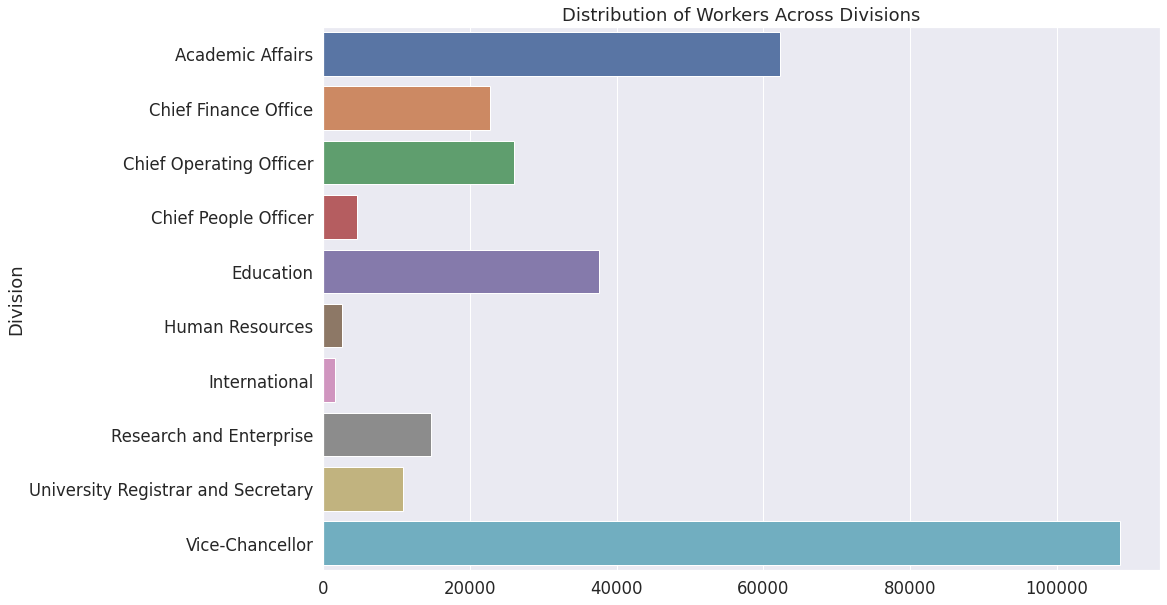

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.barplot(x=df.groupby('Division').Division.count().values,y=df.groupby('Division').Division.count().index)
plt.title('Distribution of Workers Across Divisions')
plt.show()

The graph above shows distribution of employees across different Division with Vice-Chancellor Division 
having the highest and International having the lowest

In [ ]:
reason=df.groupby('LEAVING REASON')['LEAVING REASON'].count().sort_values(ascending=False)[:5]
reason

LEAVING REASON
Contract Expired    84629
Resigned            23626
VLS/Leaver          10721
Mutual Exit          4469
Retired              3416
Name: LEAVING REASON, dtype: int64

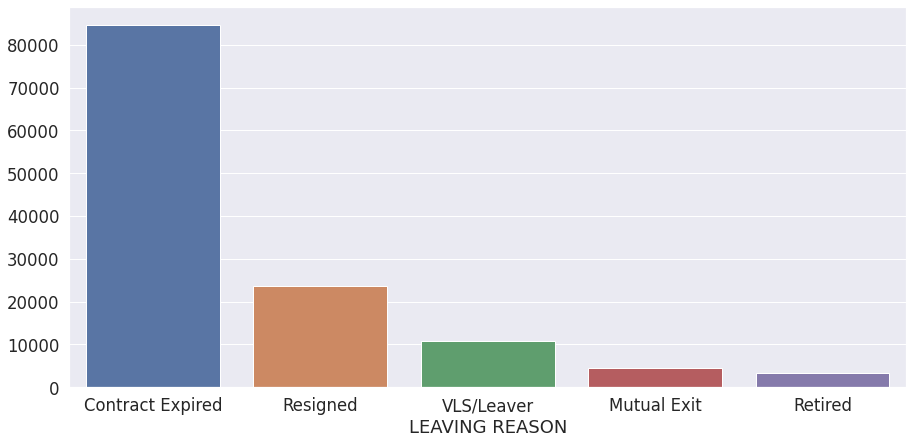

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))
sns.barplot(x=reason.index,y=reason.values)
plt.show()

Top 5 reasons employe's are leaving shows that most employee leave because their 
contract expired anf the lesat top 5 show the retired

In [ ]:
#Distribution of Employee's into Categories
df.groupby('CATEGORY').CATEGORY.count().sort_values(ascending=False )

CATEGORY
Professional    170299
Academic        121376
XX IR35             20
Name: CATEGORY, dtype: int64

In [ ]:
basis=df.groupby('BASIS').BASIS.count().sort_values(ascending=False)
basis

BASIS
Full Time              125774
Atypical                93398
Part Time               53205
Not Set                 15559
Part Time/Term Only      3429
Full Time/Term Only       322
Name: BASIS, dtype: int64

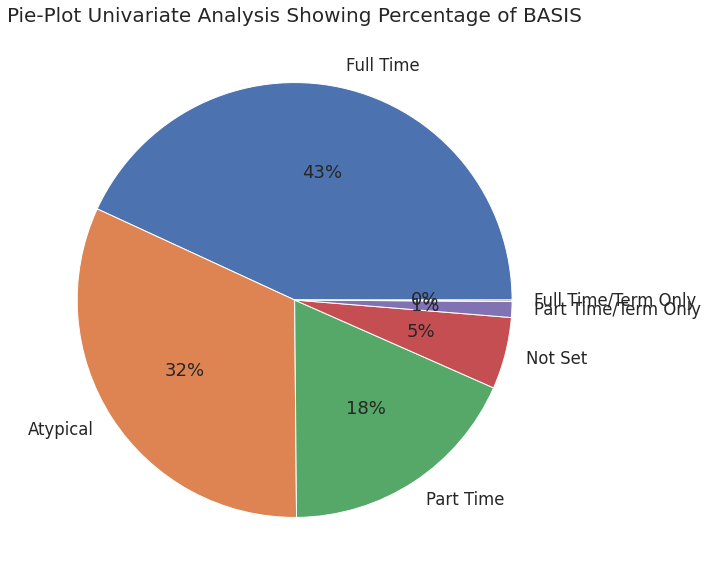

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(basis,labels=basis.index,autopct='%.0f%%')
plt.title('Pie-Plot Univariate Analysis Showing Percentage of BASIS',fontsize=20)
                
plt.show()

The Pie Chart above shows most of the employee's are Full Time Staffs with few Full Time/Term only 

In [ ]:
#The table shows employee's TYPE in desending order
type=df.groupby('TYPE').TYPE.count().sort_values(ascending=False)
type

TYPE
Continuing            147446
Occasional Worker      86880
Fixed Term             25843
Fee                    18108
Casual                  6328
External Agreement      5093
Temporary               2019
XX IR35                   20
Name: TYPE, dtype: int64

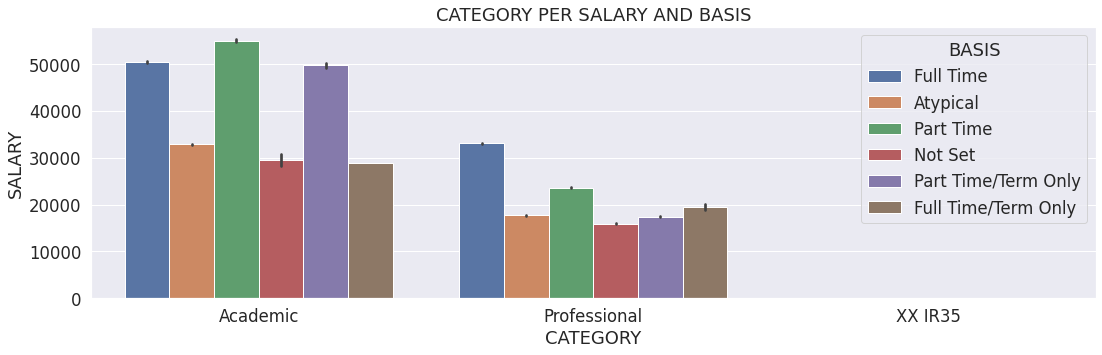

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(18,5))
sns.barplot(x='CATEGORY',
                y='SALARY',
                 hue='BASIS',
                 data=df,
                ).set_title("CATEGORY PER SALARY AND BASIS")
plt.show()

The Graph above shows that:
1. Part time employee's earn more Salary in the Academic Category followed by Full time and Part Time/Term respectively.
2. Full time employee's earn more Salary in the Professional Category followed by Part time and Full Time/Term respectively.

In [ ]:
df['Position Start Date'] = pd.to_datetime(df['Position Start Date'])

In [ ]:
df['Position Start Date']

0       2018-02-27
1       2017-06-19
2       2017-02-04
3       2015-11-08
4       2016-09-06
           ...    
52430   2020-12-10
52431   2007-06-01
52432   2015-02-09
52433   2009-09-01
52434   2015-10-12
Name: Position Start Date, Length: 291837, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(df['Position Start Date']).dt.day

0        27
1        19
2         4
3         8
4         6
         ..
52430    10
52431     1
52432     9
52433     1
52434    12
Name: Position Start Date, Length: 291837, dtype: int64

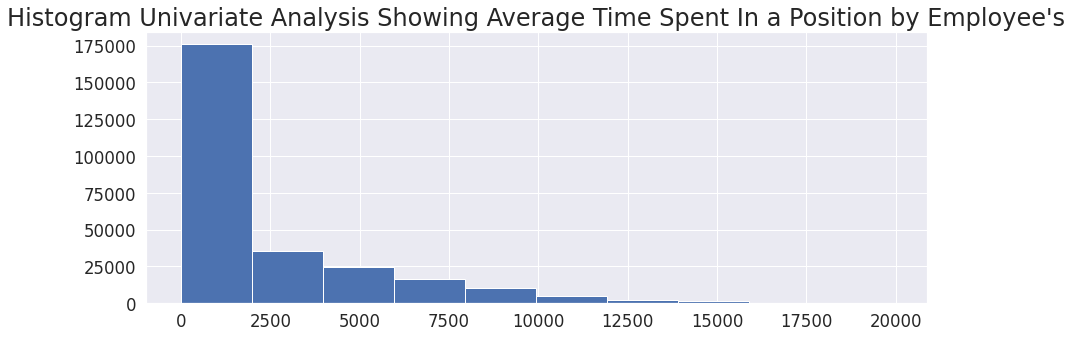

In [ ]:
plt.figure(figsize=(14, 5))
ab=plt.hist(df['SERVICE LENGTH DAYS'])
plt.title("Histogram Univariate Analysis Showing Average Time Spent In a Position by Employee's",fontsize=24)
plt.show()

The graph above shows that most of the employee's only worked between 0-2500days and the higher the work days the lower the employee's.

In [ ]:
print('Lowest Days Spent at a Position: ',df['SERVICE LENGTH DAYS'].min())
print('Highest Days Spent at a Position: ',df['SERVICE LENGTH DAYS'].max())
print('Average Days Spent at a Position: ',df['SERVICE LENGTH DAYS'].mean())

Lowest Days Spent at a Position:  0.0
Highest Days Spent at a Position:  19876.0
Average Days Spent at a Position:  2386.455107914728


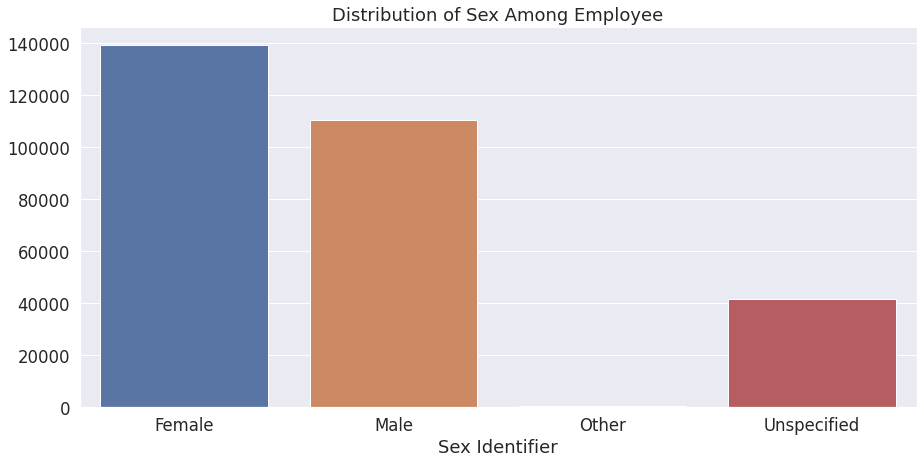

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))
sns.barplot(x=df.groupby('Sex Identifier')['Sex Identifier'].count().index,y=df.groupby('Sex Identifier')['Sex Identifier'].count().values)
plt.title('Distribution of Sex Among Employee')
plt.show()

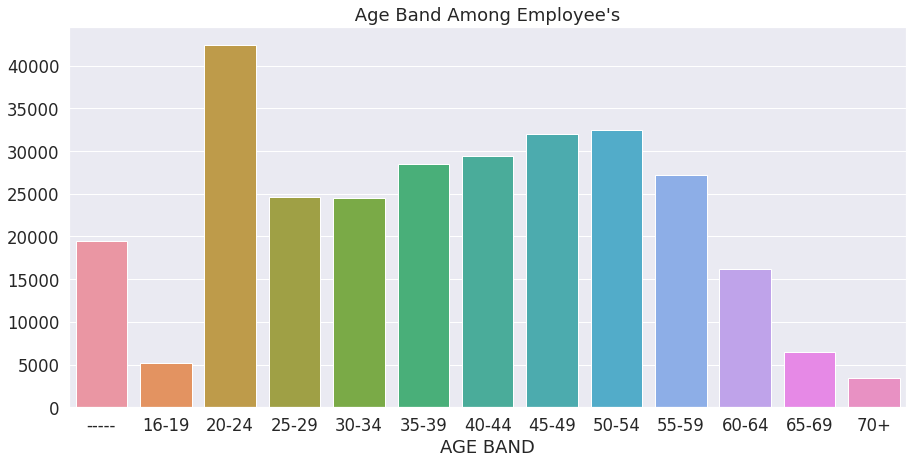

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))
sns.barplot(x=df.groupby('AGE BAND')['AGE BAND'].count().index,
            y=df.groupby('AGE BAND')['AGE BAND'].count().values)
plt.title(" Age Band Among Employee's ")
plt.show()

The Graph above shows that the employee's consist of mostly age 20-24

SUMMARY
1. Division with Vice-Chancellor Division having the highest and International having the lowest
2. Most of the employee's are leaving because their contract has ended
3. The average time spent in a position is  2386Days
4. Part time employee's earn more Salary in the Academic Category followed by Full time and Part Time/Term respectively.
5. Full time employee's earn more Salary in the Professional Category followed by Part time and Full Time/Term respectively.
6. Employee's are mostly Full Time Staffs with few Full Time/Term only
7. Employee's consist of mostly age 20-24


In [ ]:
# A Python program to print all combinations
# with an element-to-itself combination is
# also included
from itertools import combinations_with_replacement

# Get all combinations of [1, 2, 3] and length 2
# for i in range(0,3):
comb = combinations_with_replacement([1, 2, 3], 2)

# Print the obtained combinations
li = []
for i in list(comb):
	li.append(list(i))

print(li)


[[1, 1], [1, 2], [1, 3], [2, 2], [2, 3], [3, 3]]


In [ ]:
df.columns

Index(['Month Number', 'START PERIOD', 'END PERIOD', 'REPORT RUN PERIOD',
       'REPORT MONTH', 'YTD FLAG', 'Academic Year', 'FIN YTD START FLAG',
       'FIN YTD START POS', 'YTD START FLAG - Person', 'JOINER IN PERIOD',
       'LEAVER IN PERIOD', 'HEADCOUNT PERIOD END', 'New position in period',
       'Position Ended in Period', 'Position Count Period End',
       'FTE PERIOD END', 'Permanent Budget FTE Period End',
       'Temporary Budget FTE Period End', 'Total Budgeted FTE Period End',
       'Total Annual Budgeted FTE Period End', 'FTE Joiners', 'FTE LEAVERS',
       'FTE Position Started', 'FTE Position Ended', 'IN PERIOD STATUS',
       'In Period EST Status', 'Date used for Reference Data', 'Division',
       'Faculty / Professional Directorate', 'Position Start Date',
       'Position End date', 'ANNUAL WEEKS WORKED', 'CONTRACTUAL HOURS',
       'Permanent Establishment Budget', 'Temporary Establishment Budget',
       'Total Establishment Budget Hours', 'Hours Variance',


In [ ]:
df['distinct person id'].unique()

array([0, 1])

In [ ]:
df.isna().sum()

Month Number                   0
START PERIOD                   0
END PERIOD                     0
REPORT RUN PERIOD              0
REPORT MONTH                   0
                           ...  
PARTY LNK ID OCCUPANCY     19419
PERSON ID                  19419
distinct person id             0
Unnamed: 89               291837
distinct position id           0
Length: 91, dtype: int64

In [ ]:
df.shape

(291837, 91)

In [ ]:
df['Position End date'].sample(10)

21556   2021-06-01
41878   2017-09-11
1281           NaT
14643          NaT
71957   2017-05-31
21880   2021-08-01
71910   2018-01-23
15733          NaT
25304          NaT
71409   2017-05-14
Name: Position End date, dtype: datetime64[ns]

In [ ]:
df.tail()

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
52430,-13,2021-01-01,2021-01-31,01/2021,1,0,20/21,0,0,1,...,NaT,NaT,NaN,740974004Y,74573048yM,NaN,NaN,0,NaN,1
52431,-13,2021-01-01,2021-01-31,01/2021,1,0,20/21,0,0,1,...,2007-06-01,NaT,NaN,740974004Y,64030301YW,24953101Yb,46741101YZ,1,NaN,1
52432,-13,2021-01-01,2021-01-31,01/2021,1,0,20/21,0,0,1,...,2015-02-09,NaT,NaN,740974004Y,58219101YW,11280601Yb,88611701YZ,1,NaN,1
52433,-13,2021-01-01,2021-01-31,01/2021,1,0,20/21,0,0,1,...,2017-08-21,NaT,Not Applicable,740974004Y,68916701YW,4654630Hfx,9408990Hfx,1,NaN,1
52434,-13,2021-01-01,2021-01-31,01/2021,1,0,20/21,0,0,1,...,2015-10-12,2021-07-06,NaN,740974004Y,39177301YW,83000601Yb,60069901YZ,1,NaN,1


In [ ]:
import numpy as np
# Data Mining ------ Generating The CHURN column
df['Churn'] = np.where(df['Position End date'].isnull(), 'No', 'Yes')

In [ ]:
df['Churn'].tail(5)

52430    No
52431    No
52432    No
52433    No
52434    No
Name: Churn, dtype: object

In [ ]:
df.dropna(axis=1, inplace=True)

In [ ]:
df.shape

(291837, 48)

In [ ]:
df.head()

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,FTEVariance,SALARY BAND,ONE YEARS SERVICE FLAG,AGE BAND,Sex Identifier,ORG PARTY ID,POSITION ID,distinct person id,distinct position id,Churn
0,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,0.0,30k-39k,0,-----,Unspecified,740974004Y,1950110spi,0,1,Yes
1,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,0.0,10k-19k,0,-----,Unspecified,740974004Y,2102900LiG,0,1,Yes
2,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,0.0,10k-19k,0,-----,Unspecified,740974004Y,32054807if,0,1,Yes
3,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,0.0,10k-19k,0,-----,Unspecified,740974004Y,50390401YW,0,1,Yes
4,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,0.0,10k-19k,0,-----,Unspecified,740974004Y,553493048B,0,1,Yes


In [ ]:
cols = df.columns
for col in cols:
  print(col)
  print(df[col].dtype)
  print(df[col].unique())
  print("="*100)

  #  Report Run Period (obj),  Salary Band(----), Age Band(----), Sex Identifier(Replace Unspecified with mode), 
 # ORG PARTY ID(drop), POSITION ID(drop), distinction person id(drop), distinction position id(drop), Academic Year (obj), Month Number(Neg)
  # Getting The Dates Year 

Month Number
int64
[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13]
START PERIOD
datetime64[ns]
['2018-02-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-09-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2017-07-01T00:00:00.000000000'
 '2017-06-01T00:00:00.000000000' '2017-05-01T00:00:00.000000000'
 '2017-04-01T00:00:00.000000000' '2017-03-01T00:00:00.000000000'
 '2017-02-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-10-01T00:00:00.000000000' '2018-09-01T00:00:00.000000000'
 '2018-08-01T00:00:00.000000000' '2018-07-01T00:00:00.000000000'
 '2018-06-01T00:00:00.000000000' '2018-05-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000'
 '2020-04-01T00:00:00.000000000' '2020-03-01T00:00

In [ ]:
df.columns

Index(['Month Number', 'START PERIOD', 'END PERIOD', 'REPORT RUN PERIOD',
       'REPORT MONTH', 'YTD FLAG', 'Academic Year', 'FIN YTD START FLAG',
       'FIN YTD START POS', 'YTD START FLAG - Person', 'JOINER IN PERIOD',
       'LEAVER IN PERIOD', 'HEADCOUNT PERIOD END', 'New position in period',
       'Position Ended in Period', 'Position Count Period End',
       'FTE PERIOD END', 'Permanent Budget FTE Period End',
       'Temporary Budget FTE Period End', 'Total Budgeted FTE Period End',
       'Total Annual Budgeted FTE Period End', 'FTE Joiners', 'FTE LEAVERS',
       'FTE Position Started', 'FTE Position Ended', 'IN PERIOD STATUS',
       'In Period EST Status', 'Date used for Reference Data', 'Division',
       'Faculty / Professional Directorate', 'Position Start Date',
       'ANNUAL WEEKS WORKED', 'Permanent Establishment Budget',
       'Temporary Establishment Budget', 'Total Establishment Budget Hours',
       'FTE', 'Total Budgeted FTE', 'Total Annual Budgeted FTE', 'F

In [ ]:
# Converting REPORT RUN PERIOD dtype to Datetime64
df['REPORT RUN PERIOD'] = pd.to_datetime(df['REPORT RUN PERIOD'])

In [ ]:
# Extracting Month & Year Column from the "REPORT RUN PERIOD" Column
df['REPORT RUN YEAR'] = pd.DatetimeIndex(df['REPORT RUN PERIOD']).year
df['REPORT RUN MONTH'] = pd.DatetimeIndex(df['REPORT RUN PERIOD']).month

In [ ]:
df['REPORT RUN MONTH'].head()

0    2
1    2
2    2
3    2
4    2
Name: REPORT RUN MONTH, dtype: int64

In [ ]:
# Drop The REPORT RUN PERIOD Column
df.drop(['REPORT RUN PERIOD','ORG PARTY ID','POSITION ID', 'distinct person id', 'Academic Year', 'distinct position id', 'Month Number'],
          axis=1, inplace=True)

In [ ]:
df.shape

(291837, 43)

In [ ]:
df.columns

Index(['START PERIOD', 'END PERIOD', 'REPORT MONTH', 'YTD FLAG',
       'FIN YTD START FLAG', 'FIN YTD START POS', 'YTD START FLAG - Person',
       'JOINER IN PERIOD', 'LEAVER IN PERIOD', 'HEADCOUNT PERIOD END',
       'New position in period', 'Position Ended in Period',
       'Position Count Period End', 'FTE PERIOD END',
       'Permanent Budget FTE Period End', 'Temporary Budget FTE Period End',
       'Total Budgeted FTE Period End', 'Total Annual Budgeted FTE Period End',
       'FTE Joiners', 'FTE LEAVERS', 'FTE Position Started',
       'FTE Position Ended', 'IN PERIOD STATUS', 'In Period EST Status',
       'Date used for Reference Data', 'Division',
       'Faculty / Professional Directorate', 'Position Start Date',
       'ANNUAL WEEKS WORKED', 'Permanent Establishment Budget',
       'Temporary Establishment Budget', 'Total Establishment Budget Hours',
       'FTE', 'Total Budgeted FTE', 'Total Annual Budgeted FTE', 'FTEVariance',
       'SALARY BAND', 'ONE YEARS SERVICE 

In [ ]:
# drop the datetime columns
datetime_obj = df.select_dtypes(include='datetime64').columns.tolist()
df.drop(datetime_obj, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291837 entries, 0 to 52434
Data columns (total 39 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   REPORT MONTH                          291837 non-null  int64  
 1   YTD FLAG                              291837 non-null  int64  
 2   FIN YTD START FLAG                    291837 non-null  int64  
 3   FIN YTD START POS                     291837 non-null  int64  
 4   YTD START FLAG - Person               291837 non-null  int64  
 5   JOINER IN PERIOD                      291837 non-null  int64  
 6   LEAVER IN PERIOD                      291837 non-null  int64  
 7   HEADCOUNT PERIOD END                  291837 non-null  int64  
 8   New position in period                291837 non-null  int64  
 9   Position Ended in Period              291837 non-null  int64  
 10  Position Count Period End             291837 non-null  int64  
 11  F

In [ ]:
df['AGE BAND'].unique()

array(['-----', '25-29', '70+', '40-44', '30-34', '20-24', '35-39',
       '60-64', '45-49', '55-59', '50-54', '65-69', '16-19'], dtype=object)

In [ ]:
# Working with the AGE BAND column
age_mode = df["AGE BAND"].mode()[0]
df["AGE BAND"].replace("-----", age_mode, inplace=True)

# Working with the SALARY BAND column
salary_mode = df["SALARY BAND"].mode()[0]
df["SALARY BAND"].replace("------", salary_mode, inplace=True)

In [ ]:
# AGE grouping and column Renaming

df.rename(["AGE BAND": "AGE GROUP"], axis=1, inplace=True)
df['AGE GROUP'].replace(["16-19", "20-24"], ["Teen","Youth"], inplace=True)
df["AGE GROUP"].replace(["25-29","30-34","35-39","40-44","45-49","50-54","55-59"], "Adult", inplace=True)
df["AGE GROUP"].replace(["60-64", "65-69", "70+"], "Old", inplace=True)

In [ ]:
df["AGE GROUP"].unique()

array(['Youth', 'Adult', 'Old', 'Teen'], dtype=object)

In [ ]:
cols_with_obj_dtypes = df.select_dtypes(include=['object'])

for cols in cols_with_obj_dtypes:
  print(cols)
  print(df[cols].unique())
  print("="*100)

IN PERIOD STATUS
['Vacant' 'Active Period End' 'Leaver' 'Joiner' 'Joiner/Leaver']
In Period EST Status
['Added' 'Active Period End' 'Subtracted']
Division
['Academic Affairs' 'Vice-Chancellor' 'Chief Finance Office' 'Education'
 'Human Resources' 'Research and Enterprise'
 'University Registrar and Secretary' 'Chief Operating Officer'
 'Chief People Officer' 'International']
Faculty / Professional Directorate
['Academic Affairs' 'Faculty of Arts Cultures and Education'
 'Faculty of Business, Law and Politics' 'Faculty of Health Sciences'
 'Faculty of Science and Engineering' 'Other' 'University Library'
 'Campus and Accommodation Services' 'Estates' 'Finance Directorate'
 'Information and Communication Technology' 'Education'
 'Student Recruitment Directorate' 'Human Resources'
 'PVC Research and Enterprise Office' 'Student Services' 'COO Office'
 'Information Services Directorate' 'Student Services Commercial'
 'International' 'Aura' 'Doctoral College' 'Institutes'
 'Research and Inno

In [ ]:
# Replacing The "Unspecified" value in the "Sex Identifier" column
sex_mode = df['Sex Identifier'].mode()[0]
df['Sex Identifier'].replace("Unspecified", sex_mode, inplace=True)

In [ ]:
df['Sex Identifier'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# LabelBinarizing the "Churn" column
df["Churn"].replace(["Yes","No"],[1,0], inplace=True)
df["Churn"].sample(5)

13682    0
39865    0
46418    1
39638    1
22138    0
Name: Churn, dtype: int64

In [ ]:
# Working on Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=cat_cols)

In [ ]:
# DATA SEGMENTATION
labels = df["Churn"].copy()
features = df.drop("Churn", axis=1).copy()

In [ ]:
# Splitting data into Training and Validation Set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((204285, 88), (87552, 88), (204285,), (87552,))

In [ ]:
# Instatiating the model
model = RandomForestClassifier(n_estimators=200)
# fit the model
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)

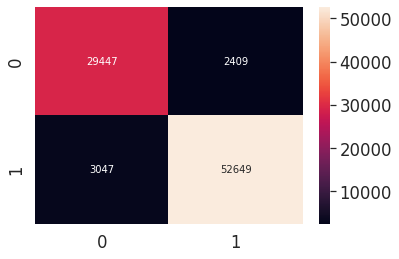

In [ ]:
# Model accuracy
acc = accuracy_score(y_test, y_pred)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, color='rgb', fmt="")

In [ ]:
acc

0.9375114217836257

In [ ]:
import joblib
joblib.dump(model, "CustomerChurnProject.pkl")

['CustomerChurnProject.pkl']

In [ ]:
joblib.load("CustomerChurnProject.pkl")

RandomForestClassifier(n_estimators=200)